In [1]:
# 해당 파일은 구글 코랩에서 작성했습니다

In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# 데이터 다운로드
from urllib.request import urlretrieve
urlretrieve('http://doc.mindscale.kr/km/unstructured/dog-vs-cat.zip','dog-vs-cat.zip')

# 데이터 압축 해제
from zipfile import ZipFile

with ZipFile('dog-vs-cat.zip') as z: 
    z.extractall()

In [6]:
# 데이터 디렉토리 변경
!mv dog-vs-cat /content/gdrive/MyDrive/Git_private_dodo_Riley/laptop_desktop/Code_SJH/딥러닝_양진욱/CV/Cats\ vs\ Dogs/

In [ ]:
# 압축 파일 제거
!rm dog-vs-cat.zip

In [8]:
# 데이터 확인
!ls /content/gdrive/MyDrive/Git_private_dodo_Riley/laptop_desktop/Code_SJH/딥러닝_양진욱/CV/Cats\ vs\ Dogs/dog-vs-cat

train  validation


In [9]:
# 모듈 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
image_height = 150   
image_width = 150   
batch_size = 10      
no_of_epochs  = 50 

In [13]:
# 이미지 제너레이터 객체 생성
train_datagen = ImageDataGenerator( 
        rescale=1./255,         
        rotation_range=40,      # 회전범위 40도
        width_shift_range=0.2,  # 좌우 이동 범위 20%
        height_shift_range=0.2, # 상하 이동 범위 20%
        shear_range=0.2,        # 기울기 범위 20%
        zoom_range=0.2,         # 확대범위 20%
        horizontal_flip=True,   # 수평반전 여부(50%확률)
    )

# 디렉토리 내 파일로부터 이미지 생성기
train_generator = train_datagen.flow_from_directory(
    'gdrive/MyDrive/Git_private_dodo_Riley/laptop_desktop/Code_SJH/딥러닝_양진욱/CV/Cats vs Dogs/dog-vs-cat/train',
    batch_size=10,       # Size of the batches of data (default: 32).
    class_mode='binary', # 이진분류
    target_size=(image_width, image_height)) # 생성될 이미지 크기

# 테스트 데이터에 대해서도 동일한 과정 수행(단, 스케일링만 진행) 
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'gdrive/MyDrive/Git_private_dodo_Riley/laptop_desktop/Code_SJH/딥러닝_양진욱/CV/Cats vs Dogs/dog-vs-cat/validation',
    batch_size=10,
    class_mode='binary',
    target_size=(image_width, image_height))

# 예측 데이터용으로 하나 더 만들기
pred_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'gdrive/MyDrive/Git_private_dodo_Riley/laptop_desktop/Code_SJH/딥러닝_양진욱/CV/Cats vs Dogs/dog-vs-cat/validation',
    batch_size=1,
    class_mode='binary',
    target_size=(image_width, image_height))

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [14]:
# train_generator가 만들어 낸 이미지 클래스 확인
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [15]:
# label name을 찾는 함수 정의
def findKey(indices, search_value):
    for key, value in indices.items():
        if(value == search_value):
            return key
    return -1

Found 2000 images belonging to 2 classes.


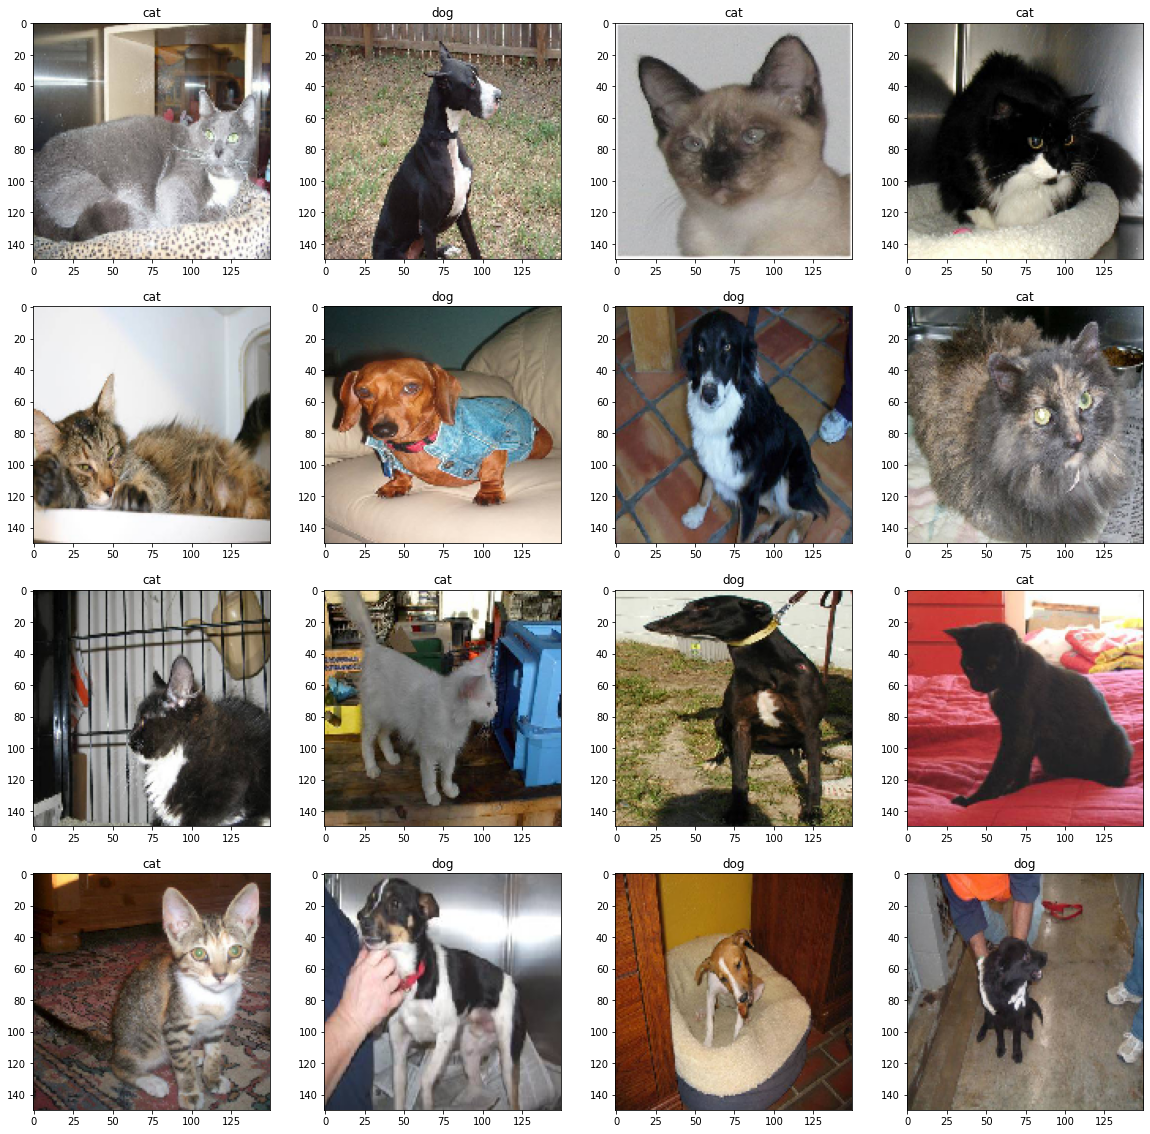

In [17]:
# train 데이터 이미지로 확인
for X_batch, y_batch in ImageDataGenerator(rescale=1./255).flow_from_directory('/content/gdrive/MyDrive/Git_private_dodo_Riley/laptop_desktop/Code_SJH/딥러닝_양진욱/CV/Cats vs Dogs/dog-vs-cat/train',
                                                                                batch_size=16, class_mode='binary', target_size=(150, 150)):
    plt.figure(figsize=(20,20))
    for i in range(0, 16):
        ax = plt.subplot(4, 4, i+1)
        ax.set_title(findKey(train_generator.class_indices, y_batch[i]))   # 이미지의 label name
        plt.imshow((X_batch[i].reshape(150, 150, 3)*255).astype(np.uint8)) # train 샘플 이미지
    plt.show()
    break

In [18]:
# 모델 구성
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height,image_width, 3))) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
# 콜백 함수
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)

In [20]:
# 모델 학습
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=2000//batch_size, 
                    epochs=no_of_epochs, 
                    validation_data=test_generator, 
                    validation_steps=800//batch_size,
                    callbacks=[monitor_val_acc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
200/200 [==============================] - 41s 149ms/step - loss: 0.6919 - accuracy: 0.5090 - val_loss: 0.6983 - val_accuracy: 0.5038
Epoch 2/50
200/200 [==============================] - 30s 148ms/step - loss: 0.6784 - accuracy: 0.5655 - val_loss: 0.6530 - val_accuracy: 0.6000
Epoch 3/50
200/200 [==============================] - 30s 150ms/step - loss: 0.6588 - accuracy: 0.5960 - val_loss: 0.6334 - val_accuracy: 0.6212
Epoch 4/50
200/200 [==============================] - 30s 151ms/step - loss: 0.6432 - accuracy: 0.6155 - val_loss: 0.6233 - val_accuracy: 0.6513
Epoch 5/50
200/200 [==============================] - 30s 151ms/step - loss: 0.6240 - accuracy: 0.6445 - val_loss: 0.6514 - val_accuracy: 0.6350
Epoch 6/50
200/200 [==============================] - 30s 150ms/step - loss: 0.6123 - accuracy: 0.6505 - val_loss: 0.5922 - val_accuracy: 0.6650
Epoch 7/50
200/200 [==============================] - 30s 150ms/step - loss: 0.6117 - accuracy: 0.6675 - val_loss: 0.6150 - val_ac

In [21]:
# 학습 결과 평가
score = model.evaluate(test_generator, steps=800//batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.586967945098877
Test accuracy: 68.99999976158142


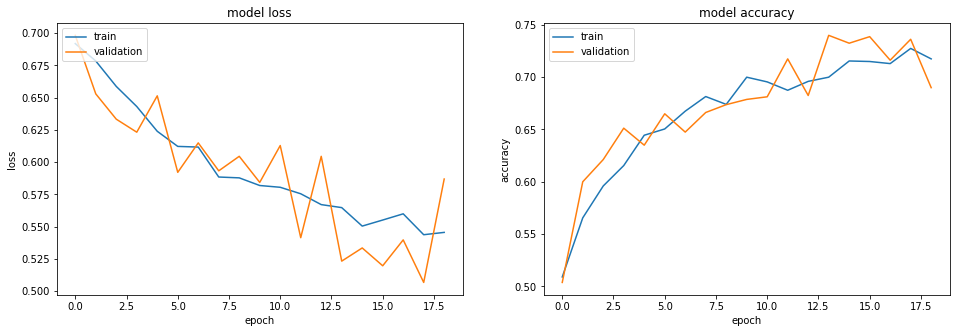

In [22]:
# 결과 시각화
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [32]:
# 모델 저장
model.save('Cats_vs_Dogs_model.h5')
print("Saved model to disk")

Saved model to disk


In [24]:
# pred_generator를 통한 예측 이미지를 사용해 결과 예측
predictions = model.predict(pred_generator, steps=16, verbose=1)

16/16 [==============================] - 0s 8ms/step


In [25]:
predictions.shape

(16, 1)

In [26]:
# 예측결과 확인
predictions

array([[0.27282172],
       [0.43703887],
       [0.860145  ],
       [0.5791582 ],
       [0.7162653 ],
       [0.87334967],
       [0.726997  ],
       [0.163381  ],
       [0.94103616],
       [0.7779418 ],
       [0.90714955],
       [0.8455993 ],
       [0.91481614],
       [0.7925762 ],
       [0.87604415],
       [0.7614678 ]], dtype=float32)

In [27]:
print(pred_generator.class_indices)

{'cat': 0, 'dog': 1}


In [28]:
# 예측 결과 시각화
f,ax = plt.subplots(4,4,figsize=(20,20))

for i in range(len(predictions)):
    image, label = pred_generator.next()               # pred_generator 가 만들어 낸 이미지를 하나씩 꺼내온다
    real_class = 'cat' if int(label) == 0 else 'dog'   # pred_generator 가 만들어 낸 이미지의 label name 을 가져옴
    ax[i//4,i%4].imshow(image[0])                      # pred_generator 가 만들어 낸 이미지를 보여줌
    ax[i//4,i%4].axis('off')

    pred_class = 'dog' if predictions[i] > 0.5 else 'cat' # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과 값의 label name
    pred_prob = predictions[i]                            # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과(확률값)
    ax[i//4,i%4].set_title('REAL:' + real_class + '\nPREDICT:' + pred_class + '(' + str(pred_prob) + ')')  # title 에 실제값과 모델에 의해 예측된 예측값을 함께 보여준다.

f.suptitle('Predict Result')

plt.show()

Output hidden; open in https://colab.research.google.com to view.